In [1]:
import os
import cv2
from tqdm import tqdm
import zipfile
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import gc

import bloscpack as bp

from utils import *
from config import *

In [2]:
TRAIN = [
    '../input/train_image_data_0.parquet',
     '../input/train_image_data_1.parquet',
     '../input/train_image_data_2.parquet',
     '../input/train_image_data_3.parquet'
]

OUT_TRAIN = 'train.zip'

In [3]:
%%time
debug = False
datadir = '../input'
featherdir = datadir
indices = [0] if debug else [0, 1, 2, 3]
train_images, label_traces = prepare_image(datadir, featherdir, data_type='train', submission=False, indices=indices)

image_df_list 4
CPU times: user 1min 11s, sys: 8.38 s, total: 1min 19s
Wall time: 1min


In [7]:
np.save('../features/train_label_traces', label_traces)

In [10]:
bp.pack_ndarray_to_file(train_images, '../features/train_images.bloscpack')

In [3]:
train = pd.read_csv('../input/train.csv')

In [5]:
train.loc[train['grapheme_root'] == 2]

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
1226,Train_1226,2,1,4,অ্যা
1244,Train_1244,2,1,4,অ্যা
1520,Train_1520,2,1,4,অ্যা
2030,Train_2030,2,0,0,অ
2108,Train_2108,2,0,0,অ
...,...,...,...,...,...
195973,Train_195973,2,1,4,অ্যা
196385,Train_196385,2,1,4,অ্যা
197664,Train_197664,2,1,4,অ্যা
198908,Train_198908,2,1,4,অ্যা


In [6]:
lbl_traces = np.load('../features/train_label_traces.npy', allow_pickle=True)

In [10]:
np.all(lbl_traces == train.iloc[:, 0:1].values)

True

In [4]:
df.shape

(50210, 32333)

In [3]:
df = pd.read_parquet(TRAIN[0])

In [27]:
img.dtype

dtype('uint8')

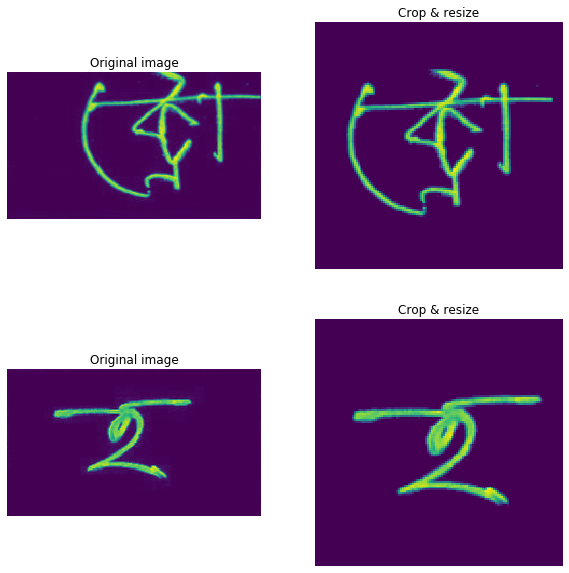

In [25]:
n_imgs = 2
fig, axs = plt.subplots(n_imgs, 2, figsize=(10, 5*n_imgs))

for idx in range(n_imgs):
    #somehow the original input is inverted
    img0 = 255 - df.iloc[idx, 1:].values.reshape(HEIGHT, WIDTH).astype(np.uint8)
    #normalize each image by its max val
    img = np.round(img0*(255.0/img0.max())).astype(np.uint8)
    img = crop_resize(img)

    axs[idx,0].imshow(img0)
    axs[idx,0].set_title('Original image')
    axs[idx,0].axis('off')
    axs[idx,1].imshow(img)
    axs[idx,1].set_title('Crop & resize')
    axs[idx,1].axis('off')
plt.show()

In [15]:
data = 255 - df.iloc[:, 1:].values.reshape(-1, HEIGHT, WIDTH).astype(np.uint8)
for idx in tqdm(range(len(df))):
    name = df.iloc[idx,0]
    #normalize each image by its max val
    img = (data[idx]*(255.0/data[idx].max())).astype(np.uint8)
    img = crop_resize(img)
    break


  0%|          | 0/50210 [00:00<?, ?it/s]


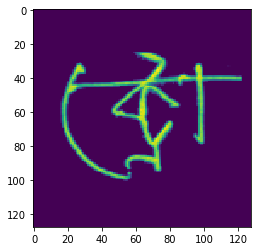

In [17]:
plt.imshow(img)